### Analysis of data by Visualizing - Seaborn and Matplotlib ###

    - Seaborn is a library for making statistical graphics in Python. 
    - It builds on top of matplotlib and integrates closely with pandas data structures.
    - Seaborn helps you explore and understand your data. Its plotting functions operate on dataframes and arrays containing whole datasets


We can do and much more:

    - Numerical variables with histograms,
    - Categorical variables with count plots,
    - Relationships between numerical variables with scatter plots, joint plots, and pair plots, and
    - Relationships between numerical and categorical variables with box-and-whisker plots and complex conditional plots.
    
About Correlation Coefficient:

The correlation coefficient is a statistical measure of the strength of a linear relationship between two variables.
Its values can range from -1 to 1.
A correlation coefficient of -1 describes a perfect negative correlation, with values in one series rising as those in the
other decline, and vice versa. A coefficient of 1 shows a perfect positive correlation. A correlation coefficient of 0 means
there is no linear relationship.

In [1]:
# Import required libraries

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
# Apply a default style for the plots

#sns.set_theme()

In [3]:
# Seaborn has many datasets built into the library. In our case we will use the dataset, 'tips', which is a study of tips
# paid and the demography of the tippers.

# Load an example dataset
tips = sns.load_dataset("tips")

print(f"Tips dataset:\n{tips.head(20)}")
print(f"\nNumber of rows: {tips.shape[0]} \nNumber of columns: {tips.shape[1]}")

Tips dataset:
    total_bill   tip     sex smoker  day    time  size
0        16.99  1.01  Female     No  Sun  Dinner     2
1        10.34  1.66    Male     No  Sun  Dinner     3
2        21.01  3.50    Male     No  Sun  Dinner     3
3        23.68  3.31    Male     No  Sun  Dinner     2
4        24.59  3.61  Female     No  Sun  Dinner     4
5        25.29  4.71    Male     No  Sun  Dinner     4
6         8.77  2.00    Male     No  Sun  Dinner     2
7        26.88  3.12    Male     No  Sun  Dinner     4
8        15.04  1.96    Male     No  Sun  Dinner     2
9        14.78  3.23    Male     No  Sun  Dinner     2
10       10.27  1.71    Male     No  Sun  Dinner     2
11       35.26  5.00  Female     No  Sun  Dinner     4
12       15.42  1.57    Male     No  Sun  Dinner     2
13       18.43  3.00    Male     No  Sun  Dinner     4
14       14.83  3.02  Female     No  Sun  Dinner     2
15       21.58  3.92    Male     No  Sun  Dinner     2
16       10.33  1.67  Female     No  Sun  Dinner   

In [4]:
#Columns in our dataset
print(f"Column names in the dataset: {list(tips.columns)}")

Column names in the dataset: ['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']


In [5]:
#Basic information
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [6]:
#Statistics of numeric columns
tips.describe()

total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000

#### Let us start with the more customizable 'Relplot' ####

    - The Seaborn Relational Plot (relplot) allows us to visualise how variables within a dataset relate to each other.
    - The Seaborn Relplot allows us to specify multiple arguments for customising our plot.

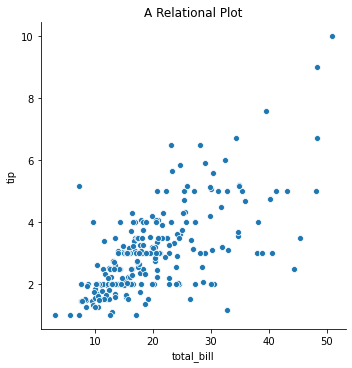

In [7]:
# A simple scatter plot using the relplot

g = sns.relplot(data=tips, x='total_bill', y='tip', kind = "scatter")
plt.title('A Relational Plot')  #give a title to our figure using matplotlib command
#g.figure.set_size_inches(6.5, 4.5) #set the figure size in inches
#g.set(ylim=(10, 0))

plt.show()

In [8]:
#Correlation between total_bill and tip
x = tips.total_bill
y = tips.tip
cor_xy = np.corrcoef(x,y)

print(cor_xy)

[[1.         0.67573411]
 [0.67573411 1.        ]]


In [9]:
# Finding the correlation coefficient of total_bill and tip, we can see that there is a strong relationship between these two
# variables as they have a positive coefficient of 0.68

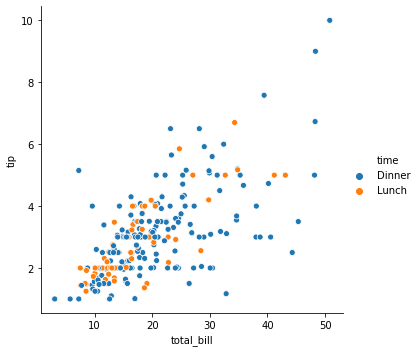

In [10]:
# Let us use the "hue" argument which allows us to specify another variable to colour our plot by

g = sns.relplot(data=tips, x='total_bill', y='tip',kind = "scatter", hue='time')

In [11]:
# In this case, we can distinguish which data points are for Lunch time (blue) and which are for Dinner time(orange).

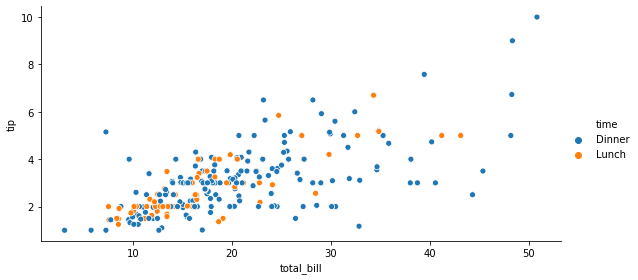

In [12]:
# Adjusting the size and aspect ratio of a plot

sns.relplot(data=tips, x='total_bill', y='tip',hue='time',height=4,aspect=2)
plt.show()

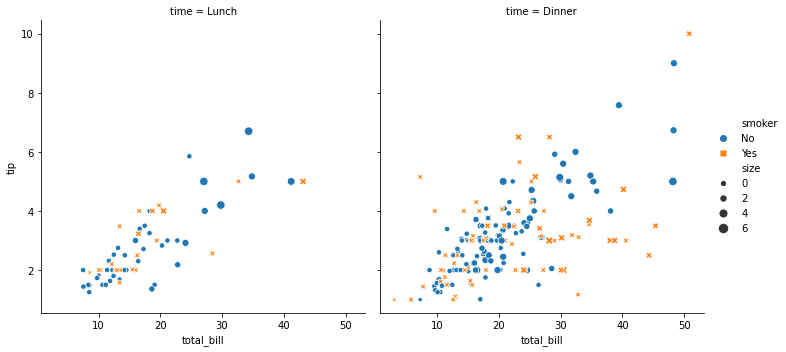

In [13]:
# Let us add a few more arguments
# This plot shows the relationship between five variables in the tips dataset using a single call to the seaborn function relplot(). 
# Notice how we provided only the names of the variables and their roles in the plot. 

sns.relplot(data=tips,x="total_bill", y="tip", col="time",hue="smoker", style="smoker", size="size",)
plt.show()

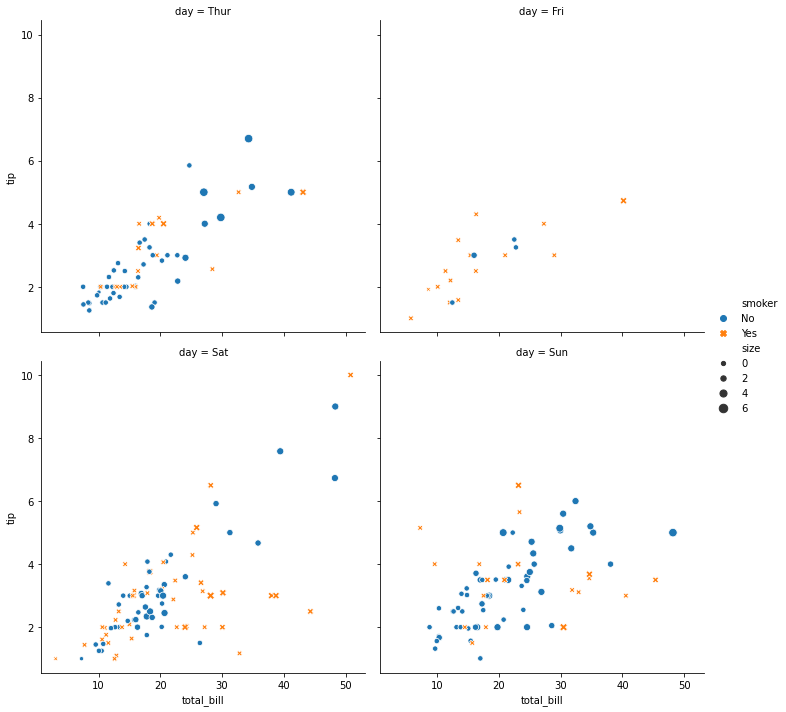

In [14]:
# if you plotted this based on the day as a column

sns.relplot(data=tips,x="total_bill", y="tip", col="day",hue="smoker", style="smoker", size="size",col_wrap=2) 
plt.show()

#### Plots for categorical Data ####

    - Several specialized plot types in seaborn are oriented towards visualizing categorical data. 
    - They can be accessed through catplot(). 
    - These plots offer different levels of granularity. 
    - At the finest level, you may wish to see every observation by drawing a: 
    
            "swarm‚Äù plot: a scatter plot that adjusts the positions of the points along the categorical axis so that they 
            do not overlap:

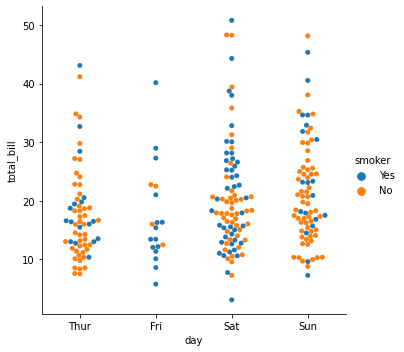

In [15]:
sns.catplot(data=tips, kind="swarm", x="day", y="total_bill", hue="smoker")
plt.show()

In [18]:
# Histogram plot

#sns.histplot(tips['tip'])

# Histogram with kde (kernel density estimate)
#sns.histplot(tips['tip'],kde=True)

#plt.show()

TypeError: unsupported operand type(s) for +: 'float' and 'str'

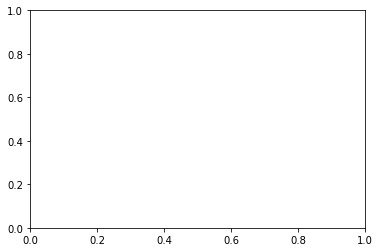

In [19]:
# When using box and whiskers plot is very interesting because we can actually see which points are the outliers
# Shows the boxplot for every numeric column

sns.boxplot(tips)
plt.show()

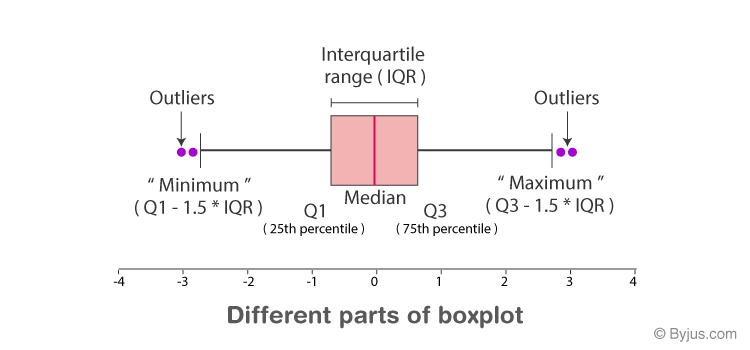

In [ ]:
# Box and whiskers plot with categorical values representations

sns.boxplot(x=tips["smoker"], y=tips["tip"],)
plt.show()

In [ ]:
# Violin plots
# It is used to visualize the distribution of numerical data. 
# Unlike a box plot that can only show summary statistics, violin plots depict summary statistics and the density of each variable.
# The violin plot shows the full distribution of the data

sns.violinplot(tips[['total_bill','tip']])
plt.show()

#### Pairwise Plots - Another very useful plot for a summarized overview ####

    - A pair plot is used to plot pairwise relationships between columns in a dataset. 
    - Create scatterplots for joint relationships and histograms for univariate distribution or relationships.  
    - It will show the relationship between all the different variables in a particular dataset. 
    - In a pair plot, we can pass hue as a parameter. hue is the parameter on which we want to calculate the pairwise plot.

In [ ]:
# pairwise plot

sns.pairplot(data=tips, hue="day")
plt.show()

#### Regplot - If you want to include the linear regression line in the plot ####



In [ ]:
sns.regplot(x = tips['total_bill'], y = tips["tip"])
plt.show()

#### Correlation Matrix ####

Correlation between 2 or more variables is often used to determine if variables are redundant in nature - one variable gives similar information as the other.

In [ ]:
correlation_matrix = tips.corr()

print(correlation_matrix)

In [ ]:
# you can use seaborn to show it as a heat map

sns.heatmap(correlation_matrix, square=True, annot=True, linewidths=3)
plt.show()

In [ ]:
#In the above heatmap, we can check the correlation between all the numeric variables of our dataset. We can notice that in 
#this occassion we have a positive relationship between all variables from the dataset.